In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader, Subset

import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = T.Compose([ T.ToTensor(),
                        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                      ])

trainset = torchvision.datasets.STL10(root='./data', download=True, split='train', transform=transform)
testset = torchvision.datasets.STL10(root='./data', download=True, split='test', transform=transform)

batchsize = 32
train_loader = DataLoader(trainset, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(testset, 256)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Check the shape of the dataset
print(f'Data shapes (train/test): {trainset.data.shape} {testset.data.shape}')

# Range of pixel intensity values
print(f'Data value Range: {np.min(trainset.data)}-{np.max(trainset.data)}')

# Unique Categories
print(f'Data Categories: {trainset.classes}')

Data shapes (train/test): (5000, 3, 96, 96) (8000, 3, 96, 96)
Data value Range: 0-255
Data Categories: ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']


In [5]:
X, y = next(iter(train_loader))

print(f'Data shapes (train/test): {X.data.shape}')

print(f'Data value Range: {torch.min(X.data)}-{torch.max(X.data)}')


Data shapes (train/test): torch.Size([32, 3, 96, 96])
Data value Range: -2.1179039478302-2.640000104904175


(array([13322., 14130.,  3610.,  3579.,  2518.,  4138., 18777.,  7471.,
         5983.,  6178.,  7415.,  6148.,  8967.,  9214.,  9245.,  9579.,
        11218., 11595.,  7968., 12734., 13195., 13694.,  9597., 15011.,
        15708., 12818., 16600., 15420., 17709., 13543., 17272., 14779.,
        14360., 13864., 14920., 14775., 10893., 12549., 13947., 14261.,
         9550., 15830., 14839., 11966., 12470., 12964., 14084., 11176.,
        10778.,  9750.,  9620.,  9406., 10508., 10292.,  7675.,  8380.,
         9143.,  7959.,  7564.,  7259.,  7985.,  6595.,  6332.,  6249.,
         6193.,  7002.,  6404.,  6396.,  6251.,  6857.,  5586.,  5330.,
         5096.,  5660.,  5710.,  5404.,  5656.,  6687.,  6823.,  5698.,
         5589.,  4674.,  4753.,  5319.,  5160.,  3121.,  4712.,  6236.,
         7337.,  5054.,  5367.,  8393.,  4054.,  4614.,  2394.,  6398.,
          696.,  1202.,  1448.,  4384.]),
 array([-2.11790395, -2.0703249 , -2.02274585, -1.9751668 , -1.92758775,
        -1.8800087 , 

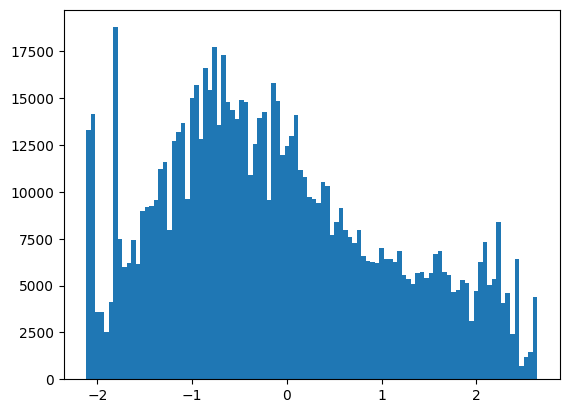

In [6]:
plt.hist(X.data.numpy().flatten(), 100)

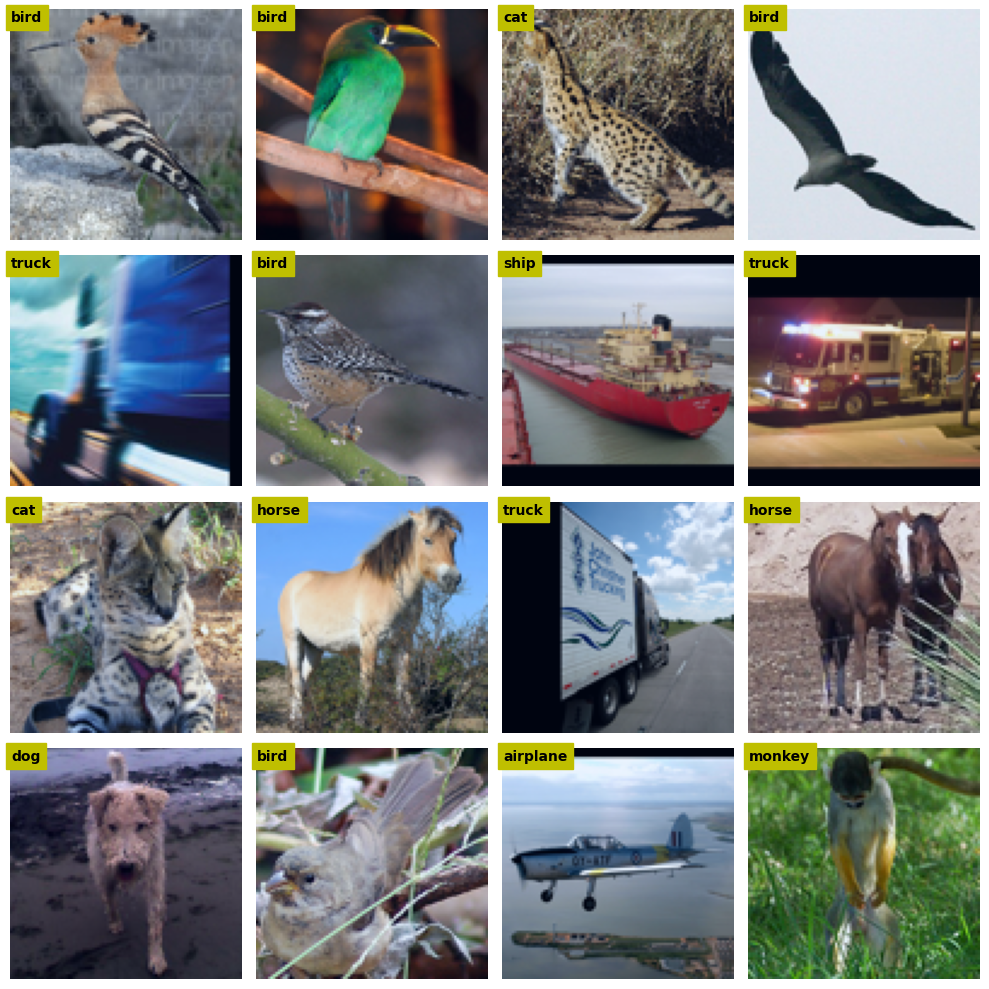

In [8]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for (i, ax) in enumerate(axs.flatten()):
    
    # extract that image, need to transpose it back to 32X32X3
    pic = X.data[i].numpy().transpose((1, 2, 0))
    pic = pic-np.min(pic) # undo normalization
    pic = pic/np.max(pic)
    
    # and its label
    label = trainset.classes[y[i]]
    
    # show
    ax.imshow(pic)
    ax.text(0, 0, label, ha='left', va='top', fontweight='bold', color='k', backgroundcolor='y')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
# Import and inspect the resnet model
resnet = torchvision.models.resnet18(pretrained=True)
resnet

/home/nimblenitesh/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nimblenitesh/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/nimblenitesh/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████| 44.7M/44.7M [00:16<00:00, 2.87MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
from torchsummary import summary
summary(resnet.to(device), (3, 96, 96))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 48, 48]          9,408
├─BatchNorm2d: 1-2                       [-1, 64, 48, 48]          128
├─ReLU: 1-3                              [-1, 64, 48, 48]          --
├─MaxPool2d: 1-4                         [-1, 64, 24, 24]          --
├─Sequential: 1-5                        [-1, 64, 24, 24]          --
|    └─BasicBlock: 2-1                   [-1, 64, 24, 24]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 24, 24]          36,864
|    |    └─BatchNorm2d: 3-2             [-1, 64, 24, 24]          128
|    |    └─ReLU: 3-3                    [-1, 64, 24, 24]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 24, 24]          36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 24, 24]          128
|    |    └─ReLU: 3-6                    [-1, 64, 24, 24]          --
|    └─BasicBlock: 2-2                   [-1, 64, 24, 24]          --
|

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 48, 48]          9,408
├─BatchNorm2d: 1-2                       [-1, 64, 48, 48]          128
├─ReLU: 1-3                              [-1, 64, 48, 48]          --
├─MaxPool2d: 1-4                         [-1, 64, 24, 24]          --
├─Sequential: 1-5                        [-1, 64, 24, 24]          --
|    └─BasicBlock: 2-1                   [-1, 64, 24, 24]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 24, 24]          36,864
|    |    └─BatchNorm2d: 3-2             [-1, 64, 24, 24]          128
|    |    └─ReLU: 3-3                    [-1, 64, 24, 24]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 24, 24]          36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 24, 24]          128
|    |    └─ReLU: 3-6                    [-1, 64, 24, 24]          --
|    └─BasicBlock: 2-2                   [-1, 64, 24, 24]          --
|

In [13]:
# Freeze all layers (final layer changed later)
for p in resnet.parameters():
    p.requires_grad = False
    

In [14]:
# Change the final layer
resnet.fc = nn.Linear(512, 10)

In [15]:
# push the model to GPU/CPU
resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)

In [17]:
numepochs = 15

# initialize losses
trainLoss = torch.zeros(numepochs)
testLoss = torch.zeros(numepochs)
testAcc = torch.zeros(numepochs)
trainAcc = torch.zeros(numepochs)

# loop over epochs
for epochi in range(numepochs):
    
    # loop over training data batches
    resnet.train() # switch to train mode
    batchLoss = []
    batchAcc = []
    
    for X, y in train_loader:
        
        X = X.to(device)
        y = y.to(device)
        
        # forward pass and loss
        yHat = resnet(X)
        loss = lossfun(yHat, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Loss and Accuracy from this batch
        batchLoss.append(loss.item())
        batchAcc.append( torch.mean((torch.argmax(yHat, axis=1) == y).float()).item() )
        
    # Get average losses and accuracy across the batches
    trainLoss[epochi] = np.mean(batchLoss)
    trainAcc[epochi] = 100*np.mean(batchAcc)
    
    # Test performace (in batches)
    resnet.eval() # switch to test mode
    batchAcc = []
    batchLoss = []
    
    for X, y in test_loader:
        X = X.to(device)
        y = y.to(device)
        
        # forward pass and loss
        with torch.no_grad():
            yHat = resnet(X)
            loss = lossfun(yHat, y)
        
        # loss and accuracy from this batch
        batchLoss.append(loss.item())
        batchAcc.append( torch.mean((torch.argmax(yHat, axis=1) == y).float()).item() )
    
    testLoss[epochi] = np.mean(batchLoss)
    testAcc[epochi] = 100*np.mean(batchAcc)
    
    print(f'Finished epoch {epochi+1}/{numepochs}, Test Accuracy: {testAcc[epochi]:.3f}%')

Finished epoch 1/15, Test Accuracy: 74.158%
Finished epoch 2/15, Test Accuracy: 75.989%
Finished epoch 3/15, Test Accuracy: 77.454%
Finished epoch 4/15, Test Accuracy: 77.942%
Finished epoch 5/15, Test Accuracy: 77.917%
Finished epoch 6/15, Test Accuracy: 78.015%
Finished epoch 7/15, Test Accuracy: 79.053%
Finished epoch 8/15, Test Accuracy: 78.638%
Finished epoch 9/15, Test Accuracy: 77.942%
Finished epoch 10/15, Test Accuracy: 78.894%
Finished epoch 11/15, Test Accuracy: 78.613%
Finished epoch 12/15, Test Accuracy: 78.638%
Finished epoch 13/15, Test Accuracy: 78.894%
Finished epoch 14/15, Test Accuracy: 79.419%
Finished epoch 15/15, Test Accuracy: 78.845%


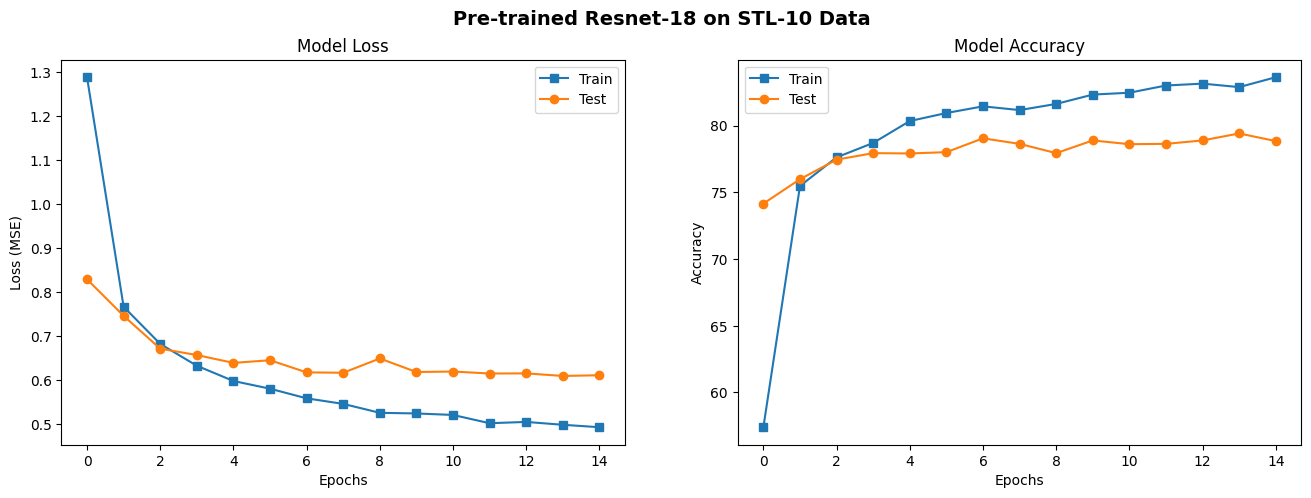

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(trainLoss, 's-', label='Train')
ax[0].plot(testLoss, 'o-', label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss (MSE)')
ax[0].set_title('Model Loss')
ax[0].legend()

ax[1].plot(trainAcc, 's-', label='Train')
ax[1].plot(testAcc, 'o-', label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].legend()

plt.suptitle('Pre-trained Resnet-18 on STL-10 Data', fontweight='bold', fontsize=14)
plt.show()

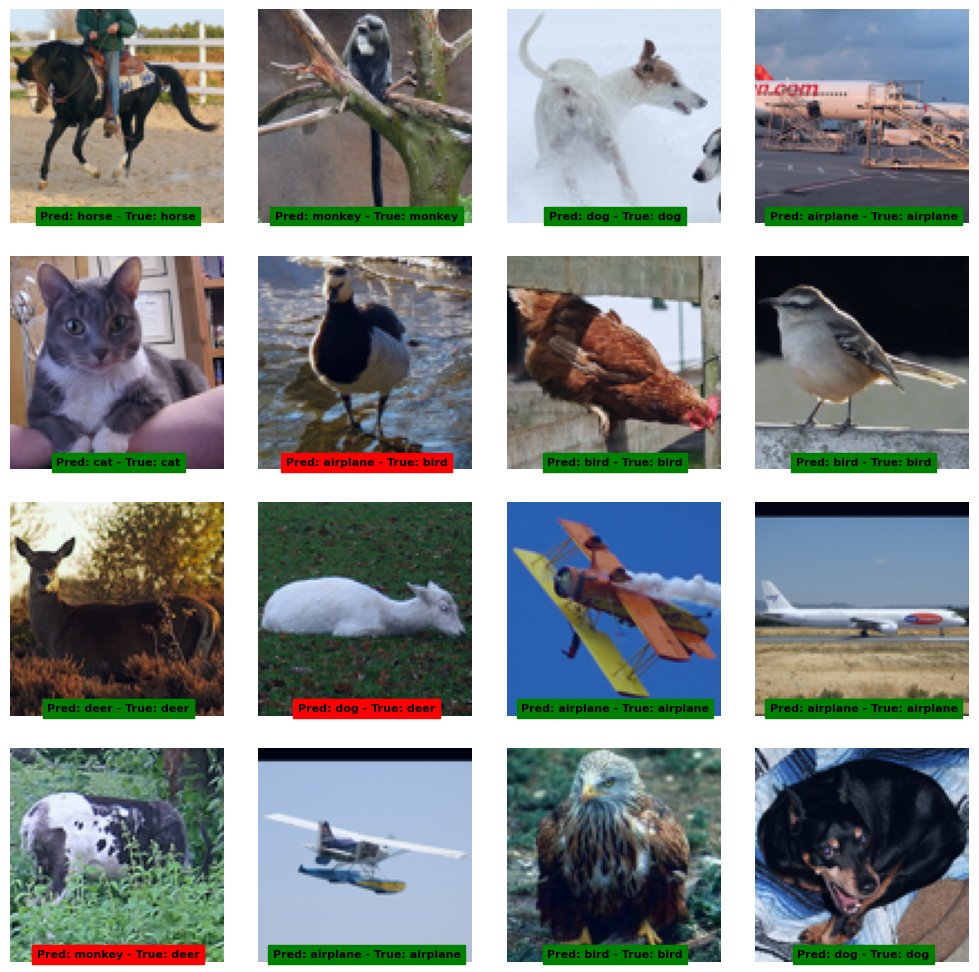

In [20]:
# Inspect a few random images

X, y = next(iter(test_loader))
X = X.to(device)
y = y.to(device)
resnet.eval()
predictions = torch.argmax( resnet(X), axis=1 )

fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for (i, ax) in enumerate(axs.flatten()):
    pic = X.data[i].numpy().transpose((1, 2, 0))
    pic = pic-np.min(pic) # undo normalization
    pic = pic/np.max(pic)
    
    ax.imshow(pic)
    
    # and its label
    label = trainset.classes[predictions[i]]
    truec = trainset.classes[y[i]]
    title = f'Pred: {label} - True: {truec}'
    
    titlecolor = 'g' if truec==label else 'r'
    ax.text(48, 90, title, ha='center', va='top', fontweight='bold', color='k', backgroundcolor=titlecolor, fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()